## Stats507 Homework7, Winter 2019
### Shuoran Li
#### shuoranl@umich.edu

I did not discuss problems with anyone else in the class on this homework.

Problem 1 took me 2 hours; Problem 2 took me 2 hours; Problem 3 took me 3 hours; Problem 4 took me 2 hours.

In [379]:
import urllib.request
import re
import matplotlib as mp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import random
import sqlite3

### Problem 1: Regular Expressions: Warmup

### 1.1 
####  Use urllib to open the URL and read the file, and produce a list of ASCII strings so that each line of the file corresponds to an element of the list.

In [380]:
response = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt')
ascii_list = [i.decode('ascii')for i in response]

In [381]:
# The number of words in the file
len(ascii_list)

113809

### 1.2
####  Look at the data

### <span style="color:red">I found the new line symbol is \r\n. So I guess the file should be created from a DOS/WINDOWS system<span>

### 1.3
#### Write a regular expression that matches any string containing exactly four consecutive consonants. Compile this regular expression, and assign it to a variable called four_consecutive_consonants. Use this regex to determine how many words from the list contain exactly four consecutive consonants.

In [382]:
word_list = [line.strip() for line in ascii_list]
four_consecutive_consonants = re.compile(r'[^aeiouy]{4}')
sum([four_consecutive_consonants.search(w) is not None for w in word_list])

1629

### 1.4
#### Write a regular expression that matches any string that contains no instances of the letter e. Compile this regular expression, and assign it to a variable called gadsby

In [383]:
gadsby = re.compile(r'^[^e]*$')
sum([gadsby.search(w) is not None for w in word_list])

37641

### 1.5
#### Write a regular expression that matches any string that begins and ends with a vowel and has no vowels in between.

In [384]:
vowel_vowel = re.compile(r'^[aeiou][^aeiou]*[aeiou]$')
sum([vowel_vowel.search(w) is not None for w in word_list])

192

### 1.6
#### Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. 

In [385]:
bookends = re.compile(r'^(\w)\1$|^(\w).\2$|^(\w)(\w).*\4\3$')
sum([bookends.search(w) is not None for w in word_list])

886

### <span style="color:red"> Explanation: I use "or ( | ) " to create this regular expression. The first term deals with the 2-letter words, e.g.( 'aa' is valid ). The second term deals with 3-letter words, e.g.( 'aba' is valid). The third term deals with words of which the length is larger than 3. <span>

### Problem 2: Exploring Internet Traffic with Regexes

### 2.1
#### Each line of this file corresponds to a single packet sent over the internet. How many packets are in this file? Save the answer in a variable n_packets.

In [386]:
SkypeIRC = open('SkypeIRC.txt')
SkypeIRC_content = SkypeIRC.read()
n_packets = file_content.count('\n')
SkypeIRC.close()
n_packets

2263

### 2.2
#### Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. An IP address consists of four numbers, which are displayed as A.B.C.D where A,B,C and D are each numbers between 0 and 255. How many unique IP addresses appear in the data set? Save the answer in a variable ip_addresses

In [387]:
regex_ip = re.compile(r'((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0-9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0-9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0-9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0-9]))')
ip_addresses = [t[0] for t in regex_ip.findall(SkypeIRC_content)]
len(set(ip_addresses))

368

### 2.3
#### Write a function called get_packets_by_regex that takes a single raw string as its argument and returns all lines of the input file that match the input raw string as a regular expression. So, for example, get_packets_by_regex(r’comcast’) will return all lines from the file containing the string ’comcast’. 

In [388]:
def get_packets_by_regex(rs):
    if not isinstance(rs,str):
        raise TypeError('Input should be a raw string')
    regex = re.compile(rs)
    file_list = SkypeIRC_content.split('\n')
    return [line for line in file_list if regex.search(line) is not None]

### 2.4
#### The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using matplotlib, create a plot displaying how many packets appeared in each second of the recording.

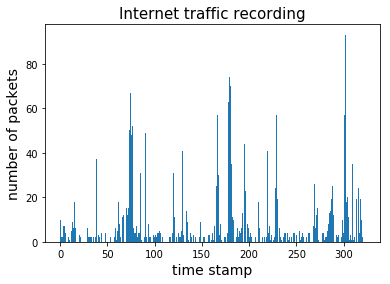

In [389]:
regex_time = re.compile(r'\s\d+\.\d+\s')
time_data = [float(num) for num in regex_time.findall(SkypeIRC_content)]
time_range = int(time_data[-1])+1
plt.hist(time_data,bins = range(time_range))
plt.xlabel("time stamp",fontsize = 14)
plt.ylabel("number of packets",fontsize = 14)
plt.title('Internet traffic recording',fontsize = 15)
_ = plt.show()

### Problem 3: Retrieving Data from the Web

### 3.1
#### In your jupyter notebook, open the URL and read the HTML using either urllib or requests, and parse it with BeautifulSoup using the standard parser, html.parser. Have a look at the parsed HTML and find the climate data table, which will have the tag table and will contain a child tag th containing a string similar to Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY). Find the node in the BeautifulSoup object corresponding to this table. What is the structure of this node of the tree (e.g., how many children does the table have, what are their tags, etc.)?

In [390]:
Harbin = urllib.request.urlopen('https://en.wikipedia.org/wiki/Harbin')
Harbin_parsed = BeautifulSoup(Harbin,'html.parser')
num_children = len(Harbin_parsed.find('table',class_='wikitable collapsible').contents)

In [391]:
print('So there are '+str(num_children)+' children, and the tag is tbody')

So there are 2 children, and the tag is tbody


### 3.2
####  Write a function retrieve_climate_table that takes as its only argument a Wikipedia URL, and returns the BeautifulSoup object corresponding to the climate data table (if it exists in the page) and returns None if no such table exists on the page. 

In [392]:
def retrieve_climate_table(url):
    if not isinstance(url,str):
        raise TypeError('url should be a string!')
    try:
        webpage = urllib.request.urlopen(url)
        web_parsed = BeautifulSoup(webpage,'html.parser')
        all_tb = web_parsed.find_all('table')
        regex = re.compile(r'Climate data for')
        tb_climate = [tb for tb in all_tb if regex.search(tb.encode('utf-8').decode('utf-8')) is not None]
        if len(tb_climate) == 0:
            return None
        else:
            # choose one table arbitrarily
            i = random.randint(0,len(tb_climate)-1)
            return tb_climate[i]
    except ValueError:
        raise ValueError('Oops, fail to connect to this url, please check the validity!')

In [393]:
retrieve_climate_table("https://en.wikipedia.org/wiki/Los_Angeles")

<table class="wikitable collapsible collapsed" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
<tbody><tr>
<th colspan="14">Climate data for Los Angeles (LAX), 1981–2010 normals, extremes 1944–present
</th></tr>
<tr>
<th scope="row">Month
</th>
<th scope="col">Jan
</th>
<th scope="col">Feb
</th>
<th scope="col">Mar
</th>
<th scope="col">Apr
</th>
<th scope="col">May
</th>
<th scope="col">Jun
</th>
<th scope="col">Jul
</th>
<th scope="col">Aug
</th>
<th scope="col">Sep
</th>
<th scope="col">Oct
</th>
<th scope="col">Nov
</th>
<th scope="col">Dec
</th>
<th scope="col" style="border-left-width:medium">Year
</th></tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)
</th>
<td style="background: #FF3A00; color:#000000;">91<br/>(33)
</td>
<td style="background: #FF3A00; color:#000000;">92<br/>(33)
</td>
<td style="background: #FF2C00; color:#000000;">95<br/>(35)
</td>
<td style="background: #FF2C00; color:#000000;">95<br/>(35

In [394]:
retrieve_climate_table("https://en.wikipedia.org/wiki/Boston")

<table class="wikitable collapsible collapsed" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
<tbody><tr>
<th colspan="14">Climate data for Boston (<a href="/wiki/Logan_International_Airport" title="Logan International Airport">Logan Airport</a>), 1981−2010 normals<sup class="reference" id="cite_ref-110"><a href="#cite_note-110">[e]</a></sup>, extremes 1872−present<sup class="reference" id="cite_ref-112"><a href="#cite_note-112">[f]</a></sup>
</th></tr>
<tr>
<th scope="row">Month
</th>
<th scope="col">Jan
</th>
<th scope="col">Feb
</th>
<th scope="col">Mar
</th>
<th scope="col">Apr
</th>
<th scope="col">May
</th>
<th scope="col">Jun
</th>
<th scope="col">Jul
</th>
<th scope="col">Aug
</th>
<th scope="col">Sep
</th>
<th scope="col">Oct
</th>
<th scope="col">Nov
</th>
<th scope="col">Dec
</th>
<th scope="col" style="border-left-width:medium">Year
</th></tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)
</th>
<td style

### 3.3
####  Write a function list_climate_table_row_names that takes as its only argument a Wikipedia URL and returns a list of the row names of the climate data table, or returns None if no such table exists.

In [395]:
def list_climate_table_row_names(url):
    tb = retrieve_climate_table(url)
    if tb == None:
        return None
    else:
        return [row.get_text().strip() for row in tb.find_all('th',scope='row')]

### 3.4
####  The next natural step would be to write a function that takes a URL and a row name and retrieves the data from that row of the climate data table (if the table exists and has that row name). Doing this would require some complicated string wrangling to get right, so I’ll spare you the trouble. Instead, please briefly describe either in pseudo code or in plain English how you would accomplish this, using the two functions you wrote above and the tools available to you in the BeautifulSoup package.

In [396]:
'''
def get_row_data(url,rowname):
    if not isinstance(rowname,str):
        raise TypeError('rowname should be a string!')
    try:
        rowname_list = list_climate_table_row_names(url)
    except:
        raise ValueError('Check validity of url!')
    if rowname_list == None:
        print('There are no climate table in this url!')
    elif rowname not in rowname_list:
        print('There are no such row in climate table!')
    else:
        ind = rowname_list.index(rowname)
    and we can find row index so that we can locate that row. And we get all the text between this row and next row
    as our desired date.
'''

"\ndef get_row_data(url,rowname):\n    if not isinstance(rowname,str):\n        raise TypeError('rowname should be a string!')\n    try:\n        rowname_list = list_climate_table_row_names(url)\n    except:\n        raise ValueError('Check validity of url!')\n    if rowname_list == None:\n        print('There are no climate table in this url!')\n    elif rowname not in rowname_list:\n        print('There are no such row in climate table!')\n    else:\n        ind = rowname_list.index(rowname)\n    and we can find row index so that we can locate that row. And we get all the text between this row and next row\n    as our desired date.\n"

### <span style="color:red"> Step Description: like the pseudo code I write above, we can firstly get the index of the row we want by finding the index of the desired rowname in the rowname_list(BY USING list_climate_table_row_name). Then we use table we get from retrieve_climate_table (of course we need to make sure those two tables in both functions are same table). And then we can locate the row by index, and get all the text between this rowname tag and next rowname tag<span>

### Problem 4: Relational Databases and SQL
### 4.1
#### Load the database using the Python sqlite3 package. How many tables are in the database? Save the answer in the variable n_tables.

In [397]:
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()
n_tables = len([x for x in c.execute('''SELECT * FROM sqlite_master WHERE type='table' ''')])
n_tables

11

### 4.2
#### What are the names of the tables in the database? Save the answer as a list of strings, table_names.

In [398]:
table_names = [x[0] for x in c.execute('''SELECT name from sqlite_master WHERE type='table' ''')]
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

### 4.3
#### Write a function list_album_ids_by_letter that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs “a” and “A” yield the same results. Include error checking that raises an error in the event that the input is not a single character.

In [399]:
def list_album_ids_by_letter(letter):
    if not isinstance(letter,str):
        raise TypeError('Input should be a string!')
    elif len(letter) != 1:
        raise ValueError('Input should be a single letter!')
    elif letter.isalpha() == False:
        raise ValueError('Input should be a single letter!')
    else:
        all_album = [x for x in c.execute('''SELECT AlbumID,Title FROM Album''')]
        return [album[0] for album in all_album if album[1][0].lower() == letter.lower()]

### 4.4
#### Write a function list_song_ids_by_album_letter that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. Again, your function should ignore case and perform error checking as in list_album_ids_by_letter. 

In [400]:
def list_song_ids_by_album_letter(letter):
    if not isinstance(letter,str):
        raise TypeError('Input should be a string!')
    elif len(letter) != 1:
        raise ValueError('Input should be a single letter!')
    elif letter.isalpha() == False:
        raise ValueError('Input should be a single letter!')
    else:
        all_album_track = [x for x in c.execute('''SELECT Title,TrackID 
                                                   FROM 
                                                       Album INNER JOIN Track
                                                   ON Album.AlbumID = Track.AlbumID''')]
        return [album[1] for album in all_album_track if album[0][0].lower() == letter.lower()]


### 4.5
#### Write a function total_cost_by_album_letter that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks’ unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Again your function should ignore case and perform appropriate error checking.

In [401]:
def total_cost_by_album_letter(letter):
    if not isinstance(letter,str):
        raise TypeError('Input should be a string!')
    elif len(letter) != 1:
        raise ValueError('Input should be a single letter!')
    elif letter.isalpha() == False:
        raise ValueError('Input should be a single letter!')
    else:
        all_album_price = [x for x in c.execute('''SELECT Title,UnitPrice
                                                   FROM 
                                                       Album INNER JOIN Track
                                                   ON Album.AlbumID = Track.AlbumID''')]
        return sum([album[1] for album in all_album_price if album[0][0].lower() == letter.lower()])
